# BlackJack: Training using OpenAI's Gymnasium

In [1]:
import numpy as np
from collections import defaultdict
import gymnasium as gym

env = gym.make("Blackjack-v1", sab=True)

# Q-table initialized to 0
Q = defaultdict(lambda: np.zeros(env.action_space.n))

# Hyperparameters
alpha = 0.1      # learning rate
gamma = 1.0      # discount factor (no future beyond win/loss)
epsilon = 0.1    # exploration rate
episodes = 500_000

def epsilon_greedy_policy(state, epsilon):
    if np.random.rand() < epsilon:
        return env.action_space.sample()
    else:
        return np.argmax(Q[state])

for episode in range(episodes):
    state, _ = env.reset()
    done = False

    while not done:
        action = epsilon_greedy_policy(state, epsilon)
        next_state, reward, done, truncated, info = env.step(action)
        
        best_next_action = np.argmax(Q[next_state])
        td_target = reward + gamma * Q[next_state][best_next_action]
        td_delta = td_target - Q[state][action]
        Q[state][action] += alpha * td_delta

        state = next_state

print("Training complete!")

Training complete!


# BlackJack: Policy Visualization

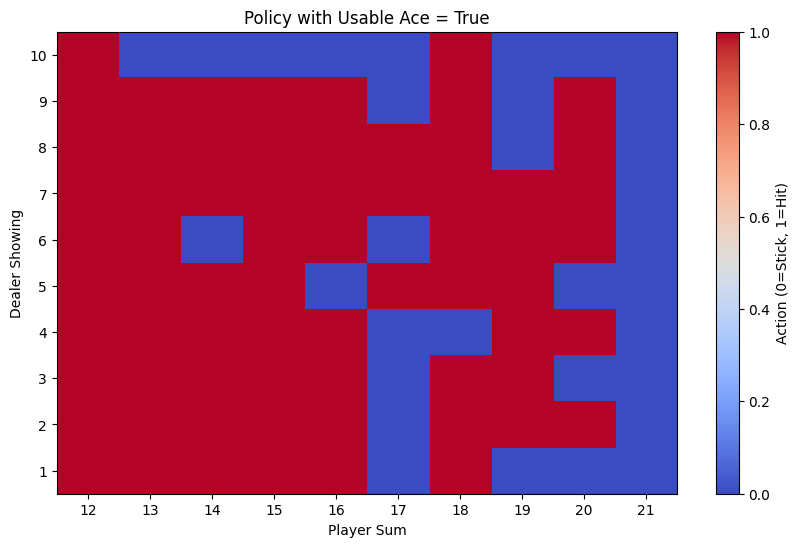

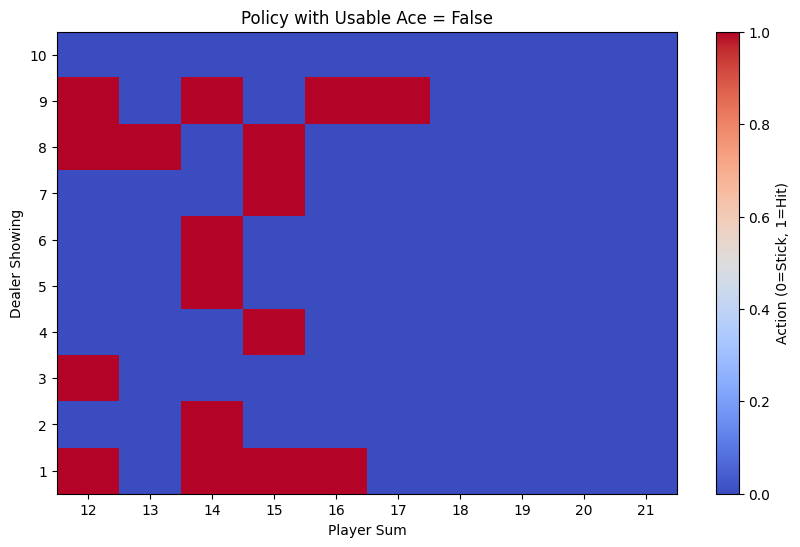

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def plot_policy(Q, usable_ace=True):
    policy = np.zeros((10, 22))  # dealer 1-10, player sum 12-21 (index 12–21)

    for player_sum in range(12, 22):  # player's hand
        for dealer_card in range(1, 11):  # dealer's face-up card
            state = (player_sum, dealer_card, usable_ace)
            action = np.argmax(Q[state])
            policy[dealer_card - 1, player_sum] = action

    fig, ax = plt.subplots(figsize=(10, 6))
    cax = ax.imshow(policy[:, 12:], cmap="coolwarm", origin="lower", aspect="auto")
    ax.set_xticks(np.arange(0, 10))
    ax.set_yticks(np.arange(0, 10))
    ax.set_xticklabels(np.arange(12, 22))
    ax.set_yticklabels(np.arange(1, 11))
    ax.set_xlabel("Player Sum")
    ax.set_ylabel("Dealer Showing")
    ax.set_title(f"Policy with Usable Ace = {usable_ace}")
    fig.colorbar(cax, label="Action (0=Stick, 1=Hit)")
    plt.show()

plot_policy(Q, usable_ace=True)
plot_policy(Q, usable_ace=False)


In [3]:
def play_blackjack(Q, render=True):
    state, _ = env.reset()
    done = False
    total_reward = 0

    if render:
        print(f"Initial state: Player sum = {state[0]}, Dealer = {state[1]}, Usable Ace = {state[2]}")

    while not done:
        action = np.argmax(Q[state])  # choose best action from Q-table
        action_str = "Stick" if action == 0 else "Hit"

        if render:
            print(f"Action: {action_str}")

        next_state, reward, done, _, _ = env.step(action)
        state = next_state
        total_reward = reward

        if render:
            print(f"New state: Player sum = {state[0]}, Dealer = {state[1]}, Usable Ace = {state[2]}")

    outcome = "Win" if total_reward > 0 else "Draw" if total_reward == 0 else "Lose"
    if render:
        print(f"\nGame over: {outcome} (Reward: {total_reward})")

    return total_reward

# BlackJack: Play 1 Game

In [4]:
# Run one game
play_blackjack(Q)

Initial state: Player sum = 16, Dealer = 10, Usable Ace = 1
Action: Stick
New state: Player sum = 16, Dealer = 10, Usable Ace = 1

Game over: Lose (Reward: -1.0)


-1.0